<a href="https://colab.research.google.com/github/Andres-Gress/EDP_I/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTEGRAL DE FOURIER**


 $f(x)=\left\{\begin{matrix}
 \quad 1 \quad si \quad -1\leq x \leq 1\\ 0 \quad \text{ en otro caso}
\end{matrix}\right.$


a) Grafique esta función.

b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.

c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy.

**SOLUCION**

$f(x)=\int_0^\infty [A(\omega)cos(\omega x)+B(\omega)sen(\omega x)]d\omega$

$A(\omega)=\frac{1}{\pi }\int_{-\infty}^\infty f(v)cos(\omega v) dv$

$B(\omega)=\frac{1}{\pi }\int_{-\infty}^\infty f(v)sen(\omega v) dv$

Resolviendo, tenemos que:

$A(\omega)=\frac{2}{\pi \omega}\sin(\omega)$

$B(\omega)=0$



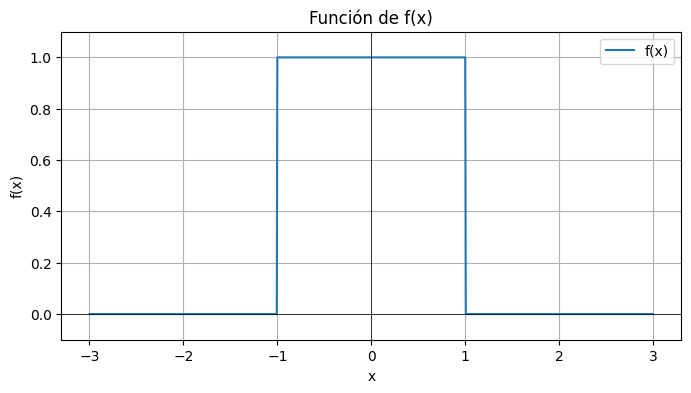

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pulso_unitario(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

x = np.linspace(-3, 3, 1000)
y = pulso_unitario(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='f(x)')
plt.title('Función de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

Gráfica de $f(x)$

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, v, w = sp.symbols('x v w', real=True)
a = 1

f = sp.Piecewise((1, (v >= -a) & (v <= a)), (0, True))

A_w = (1/sp.pi) * sp.integrate(f * sp.cos(w*v), (v, -sp.oo, sp.oo))
B_w = (1/sp.pi) * sp.integrate(f * sp.sin(w*v), (v, -sp.oo, sp.oo))

A_w_simp = sp.simplify(A_w)
B_w_simp = sp.simplify(B_w)

print("A(w) =", A_w_simp)
print("B(w) =", B_w_simp)


A(w) = Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True))
B(w) = 0


Aquí obtenemos que

$A(\omega)=\frac{2}{\pi \omega}\sin(\omega)$

$B(\omega)=0$

$f(x)=\int_0^\infty \frac{2}{\pi \omega}\sin(\omega)cos(\omega x)d\omega$

<ipython-input-73-1272009393>:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand(omega), omega)


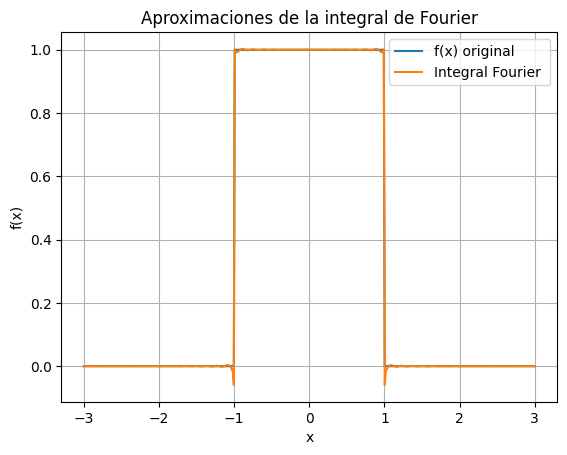

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

a_val=1000

x, v, w = sp.symbols('x v w', real=True)

A = (1/sp.pi) * sp.integrate(sp.cos(w*v), (v, -1, 1))
A_simplified = sp.simplify(A)

B_simplified = 0

def f_original(x):
    return np.where(np.abs(x) <= 1, 1, 0)

def f_approx(x_val, a_val):
    def integrand(w_val):
        val = np.where(w_val == 0, 2/np.pi, 2*np.sin(w_val)/(np.pi*w_val))
        return val * np.cos(w_val * x_val)

    omega = np.linspace(0, a_val, 1000)
    integral = np.trapz(integrand(omega), omega)
    return integral

x_vals = np.linspace(-3, 3, 500)

plt.plot(x_vals, f_original(x_vals), label='f(x) original')


f_vals = np.array([f_approx(xi, a_val) for xi in x_vals])
plt.plot(x_vals, f_vals, label=f'Integral Fourier ')

plt.legend()
plt.title('Aproximaciones de la integral de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

<ipython-input-47-1979574294>:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand(omega), omega)


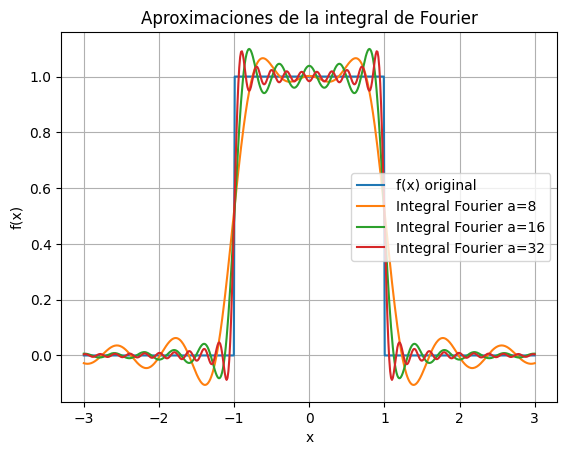

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

x, v, w = sp.symbols('x v w', real=True)

A = (1/sp.pi) * sp.integrate(sp.cos(w*v), (v, -1, 1))
A_simplified = sp.simplify(A)

B_simplified = 0

def f_original(x):
    return np.where(np.abs(x) <= 1, 1, 0)

def f_approx(x_val, a_val):
    def integrand(w_val):
        val = np.where(w_val == 0, 2/np.pi, 2*np.sin(w_val)/(np.pi*w_val))
        return val * np.cos(w_val * x_val)

    omega = np.linspace(0, a_val, 1000)
    integral = np.trapz(integrand(omega), omega)
    return integral

x_vals = np.linspace(-3, 3, 500)

plt.plot(x_vals, f_original(x_vals), label='f(x) original')

for a_val in [8, 16, 32]:
    f_vals = np.array([f_approx(xi, a_val) for xi in x_vals])
    plt.plot(x_vals, f_vals, label=f'Integral Fourier a={a_val}')

plt.legend()
plt.title('Aproximaciones de la integral de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Aquí se aprecia para distintos armonicos